<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Avocado_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [0]:
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

#download data
url = 'drive/My Drive/datasets/avocado.csv'
avocado = pd.read_csv(url)

In [0]:
#drop Useless column
avocado = avocado.drop(['Unnamed: 0'],axis =1 )

#Rename column key names
names = ['date','avprice','totalvol','small','large','xlarge',
         'totalbags','smallbags','largebags','xlargebags','type','year','region']
avocado = avocado.rename(columns=dict(zip(avocado.columns,names)))

In [27]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18249 non-null  object 
 1   avprice     18249 non-null  float64
 2   totalvol    18249 non-null  float64
 3   small       18249 non-null  float64
 4   large       18249 non-null  float64
 5   xlarge      18249 non-null  float64
 6   totalbags   18249 non-null  float64
 7   smallbags   18249 non-null  float64
 8   largebags   18249 non-null  float64
 9   xlargebags  18249 non-null  float64
 10  type        18249 non-null  object 
 11  year        18249 non-null  int64  
 12  region      18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [0]:
#Append Year, Month, Day data 
avocado['Year'],avocado['Month'],avocado['Day'] = avocado['date'].str.split('-').str

In [0]:
#Transform data type to int from string
for i in ['Year','Month','Day']:
  avocado[i] = list(map(float,avocado[i]))

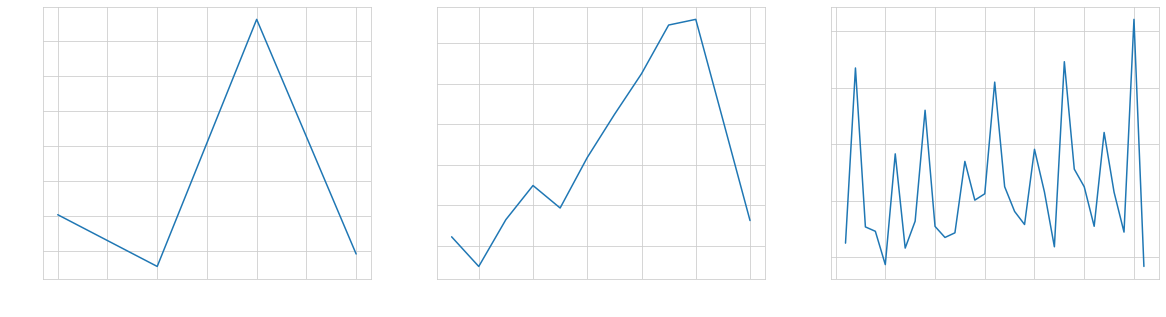

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(131)
Years = avocado.groupby('Year').mean()
Years['avprice'].plot(x=avocado.Year)
plt.subplot(132)
Months = avocado.groupby('Month').mean()
Months['avprice'].plot(x=avocado.Month)
plt.subplot(133)
Days = avocado.groupby('Day').mean()
Days['avprice'].plot(x=avocado.Day)

Text(0, 0.5, 'Regions')

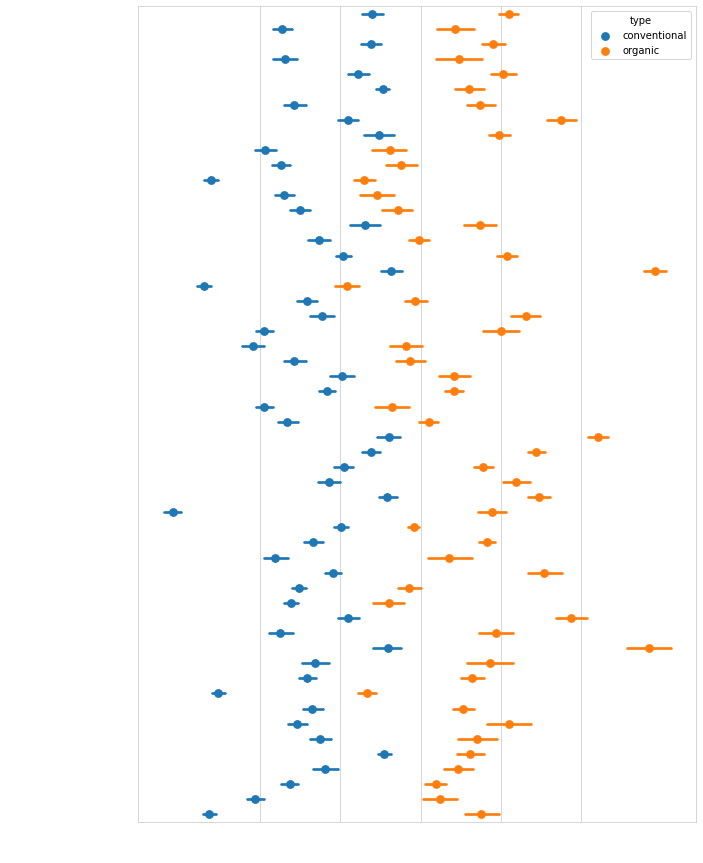

In [31]:
plt.figure(figsize=(10,15))
sns.pointplot(x='avprice',y='region',data=avocado,hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize':'large'})
plt.ylabel('Regions',{'fontsize':'large'})

In [32]:
#One hot encoding
ohe = pd.get_dummies(avocado[['region','type']])
ohe

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_conventional,type_organic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
y = np.array(avocado['avprice'])
data = np.array(avocado)
X = np.c_[data[:,2:10],data[:,13:16],np.array(ohe)]

In [0]:
transform = MinMaxScaler()
X = transform.fit_transform(X)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [36]:
network = models.Sequential()
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',
                loss='mean_squared_error',)               

network.fit(X_train,y_train,epochs=50,batch_size=128)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/50
14599/14599 [==============================] - 2s 140us/step - loss: 0.1592
Epoch 2/50
14599/14599 [==============================] - 0s 25us/step - loss: 0.0600
Epoch 3/50
14599/14599 [==============================] - 0s 26us/step - loss: 0.0558
Epoch 4/50
14599/14599 [==============================] - 0s 25us/step - loss: 0.0524
Epoch 5/50
14599/14599 [==============================] - 0s 24us/step - loss: 0.0506
Epoch 6/50
14599/14599 [==============================] - 0s 25us/step - loss: 0.0477
Epoch 7/50
14599/14599 [==============================] - 0s 24us/step - loss: 0.0459
Epoch 8/50
14599/14599 [==============================] - 0s 24us/step - loss: 0.0449
Epoch 9/50
14599/14599 [==============================] - 0s 25us/step - loss: 0.0427
Epoch 10/50
14599/14599 [==============================] - 0s 25us/step - loss: 0.0417
Epoch 11/50
14599/14599 [==============================]

In [0]:
def compare_graph(network,X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(100):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  plt.figure(figsize=(10,5))
  plt.plot(index,real,'b-',label='Real Price')
  plt.plot(index,pred,'r--',label='Pred price')
  plt.legend(loc='center left',fontsize=12)
  plt.show()

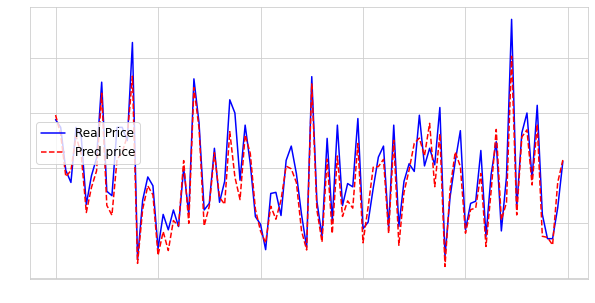

In [38]:
compare_graph(network,X_test,y_test)